# Multiple Linear Regression with 3D Visualization

### Project Overview
This project demonstrates the implementation of multiple linear regression from scratch using Python. It not only provides a clear step-by-step explanation but also enhances understanding through animations and 3D visualizations. Multiple linear regression is a fundamental machine learning algorithm that models the relationship between multiple independent variables and a dependent variable. Understanding its inner workings and gradient descent optimization is crucial for any aspiring data scientist or machine learning enthusiast.

### Features

##### Complex Synthetic Data: 
The project uses a synthetic dataset with four features to simulate real-world scenarios where multiple factors influence the outcome.

#### Feature Normalization: 
The features are normalized to ensure stable and efficient gradient descent.

#### Gradient Descent with Animation:
Visualize the gradient descent process with animated updates to the regression line, helping to grasp the optimization process.

#### 3D Scatter Plot:
Explore the data with a 3D scatter plot, making it easier to understand the relationship between features and the target variable.

#### Cost Function Visualization: 
Track the cost function's evolution over training iterations, providing insights into the learning process's convergence.

In [101]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [102]:
# Generate synthetic data with four features
np.random.seed(0)
num_samples = 200
X1 = np.random.rand(num_samples) * 10
X2 = np.random.rand(num_samples) * 5
X3 = np.random.rand(num_samples) * 3
X4 = np.random.rand(num_samples) * 2
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + 0.5 * X4 + np.random.randn(num_samples)

In [103]:
# Normalize the features (optional but recommended)
X1_normalized = (X1 - np.mean(X1)) / np.std(X1)
X2_normalized = (X2 - np.mean(X2)) / np.std(X2)
X3_normalized = (X3 - np.mean(X3)) / np.std(X3)
X4_normalized = (X4 - np.mean(X4)) / np.std(X4)

In [104]:
# Initialize parameters (coefficients and intercept)
beta0 = np.random.rand()
beta1 = np.random.rand()
beta2 = np.random.rand()
beta3 = np.random.rand()
beta4 = np.random.rand()

In [105]:
# Initialize lists to store parameter history and cost history
params_history = []
cost_history = []

In [106]:
# Initialize evaluation metrics
mae_history = []
mse_history = []

In [107]:
# Set hyperparameters
learning_rate = 0.01
epochs = 1000

In [108]:
# Lists to store parameter history and cost history
params_history = []
cost_history = []


Text(0.5, 0.92, 'Multiple Linear Regression - 3D Scatter Plot')

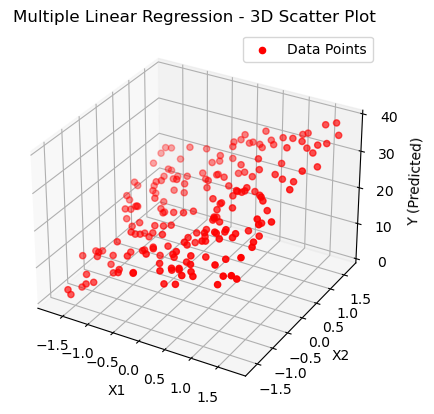

In [109]:
# Create a 3D scatter plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1_normalized, X2_normalized, Y, c='r', marker='o', label='Data Points')

# Add labels and legend to the 3D plot
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y (Predicted)')
ax.legend()
ax.set_title('Multiple Linear Regression - 3D Scatter Plot')


In [110]:
# Gradient Descent with animation
for epoch in range(epochs):
    # Calculate predicted values
    predicted = beta0 + beta1 * X1_normalized + beta2 * X2_normalized + beta3 * X3_normalized + beta4 * X4_normalized
    
    # Calculate the cost (mean squared error)
    error = predicted - Y
    cost = np.mean(error ** 2)
    
    # Calculate evaluation metrics (MAE and MSE)
    mae = np.mean(np.abs(error))
    mse = cost
    
    # Calculate gradients
    grad0 = np.mean(error)
    grad1 = np.mean(error * X1_normalized)
    grad2 = np.mean(error * X2_normalized)
    grad3 = np.mean(error * X3_normalized)
    grad4 = np.mean(error * X4_normalized)
    
    # Update parameters
    beta0 -= learning_rate * grad0
    beta1 -= learning_rate * grad1
    beta2 -= learning_rate * grad2
    beta3 -= learning_rate * grad3
    beta4 -= learning_rate * grad4
    
    # Store parameter and cost history for visualization
    params_history.append([beta0, beta1, beta2, beta3, beta4])
    cost_history.append(cost)
    
    # Store evaluation metrics
    mae_history.append(mae)
    mse_history.append(mse)
    
    # Plot the updated regression line for each iteration
    if epoch % 10 == 0:
        ax.plot(X1_normalized, X2_normalized, predicted, label=f'Iteration {epoch}')

Text(0.5, 1.0, 'Cost Function over Iterations')

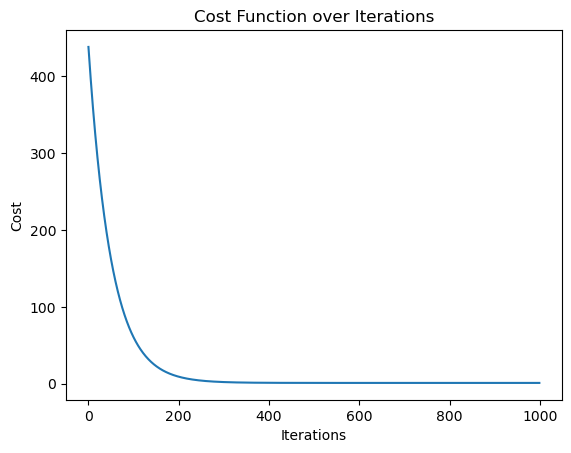

In [111]:
# Visualize cost over iterations
plt.figure()
plt.plot(range(epochs), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')


Text(0.5, 0.92, '3D Visualization of Cost Function over Parameters')

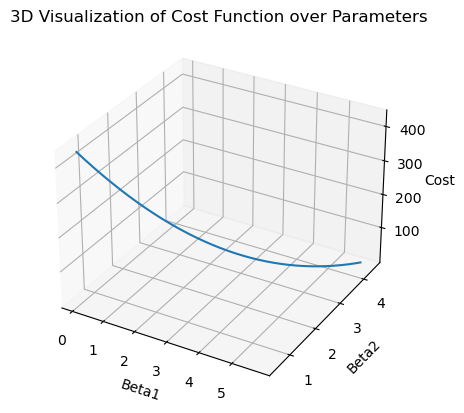

In [112]:
# Create a 3D plot for parameters and cost function
fig_params = plt.figure()
ax_params = fig_params.add_subplot(111, projection='3d')

# Extract parameter values for the cost function visualization
beta0_history, beta1_history, beta2_history, beta3_history, beta4_history = zip(*params_history)

# Plot the cost function over parameters
ax_params.plot(beta1_history, beta2_history, cost_history, label='Cost Function')
ax_params.set_xlabel('Beta1')
ax_params.set_ylabel('Beta2')
ax_params.set_zlabel('Cost')
ax_params.set_title('3D Visualization of Cost Function over Parameters')

In [117]:
# Print the final parameters
print("Final Parameters:")
print("Intercept (beta0):", beta0)
print("Coefficient for X1 (beta1):", beta1)
print("Coefficient for X2 (beta2):", beta2)
print("Coefficient for X3 (beta3):", beta3)
print("Coefficient for X4 (beta4):", beta4)
print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))

Final Parameters:
Intercept (beta0): 20.032894783132217
Coefficient for X1 (beta1): 5.711014607231561
Coefficient for X2 (beta2): 4.4197382723185665
Coefficient for X3 (beta3): 1.384338682587256
Coefficient for X4 (beta4): 0.35788482761313073
Mean Absolute Error (MAE): 0.77
Mean Squared Error (MSE): 0.93


Now we are going to use the above parameters as an instance for predicting gas production.

* #### Well Depth: 
The depth of the gas well, which can influence gas production. Deeper wells may access gas reservoirs with higher pressure and larger volumes.

* #### Reservoir Porosity: 
Porosity is a measure of the rock's ability to hold gas. Higher porosity can mean more space for gas storage and potentially higher production.

* #### Reservoir Permeability:
Permeability is a measure of how easily gas can flow through rock. Higher permeability can lead to better gas flow and production rates.

* #### Reservoir Temperature: 
Temperature can affect gas viscosity. Higher temperatures can reduce the viscosity of gas, making it easier to flow and potentially increasing production.

In [118]:
# Replace variables into actual gas production determinants 
# Note the variables replaced are not meaningful in terms of corresponding determinants of gas production.
# I am just showing an example of how it can be used in a real world application for better intuitive  understanding

Intercept = beta0 
WellDepth = beta1 
ReservoirPorosity = beta2 
ReservoirPermeability = beta3 
ReservoirTemperature = beta4 

In [119]:
# Create a new data instance for gas production prediction
new_data_instance_gas_production = np.array([6.0, 3.0, 2.0, 1.0])  # Replace with your own feature values

In [120]:
# Normalize the new data instance using the same mean and standard deviation as the training data
#new_data_instance_normalized = (
    #(new_data_instance_gas_production - np.mean(X1)) / np.std(X1),
    #(new_data_instance_gas_production - np.mean(X2)) / np.std(X2),
    #(new_data_instance_gas_production - np.mean(X3)) / np.std(X3),
    #(new_data_instance_gas_production - np.mean(X4)) / np.std(X4),
#)

# The above is optional, it depends on the instance data you use. In this example I will not normalize the new data.
# If you like to normalize it, just remove #.


new_data_instance_normalized = new_data_instance_gas_production

In [121]:
# Make a prediction for gas production using the named dependent variables
gas_production_prediction = (
    Intercept + WellDepth * new_data_instance_normalized[0]
    + ReservoirPorosity * new_data_instance_normalized[1]
    + ReservoirPermeability * new_data_instance_normalized[2]
    + ReservoirTemperature * new_data_instance_normalized[3]
)

In [99]:

print("Predicted Gas Production:", round (gas_production_prediction, 2))

Predicted Gas Production: 70.68


## Why This Project Matters
Understanding linear regression and gradient descent is foundational for anyone entering the field of machine learning and data science. This project offers a hands-on approach to learning these concepts, making it a valuable resource for students, professionals, and enthusiasts alike. The inclusion of animations and 3D visualizations enhances comprehension and provides a clear picture of how linear regression works.